In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# ### Analysis Project 
# 
# ### 2022-11-2

# ### Statistical significance tests on movie ratings data
                    
# We acknowledge any outcome could be due to
# chance. Our only question is how likely that is by chance. If it is
# implausibly unlikely, we reject the assumption that it was just due to
# chance. And either the null hypothesis is true or not, so if we reject it
# is plausible, it probably means that our treatment did have an effect.                  
                    
#%% Before we do the stats, let's talk about the psychology of movie ratings:
    
# Hypothesis 1: There is no difference in the distribution of ratings between the two movies.

# Hypothesis 2: Distribution of ratings for one of the movies will be different from the other.

# Make sure that you actually have 2 plausible outcomes before doing the
# study. If the outcome is a foregone conclusion, it's not science. Science
# is about being open to any possible outcome.

# Null hypothesis: There is no difference. 

# Let's implement the canonical data analysis cascade



# b. Load/import - libraries/packages:

import pandas as pd
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
import seaborn as sns


# Let me walk you through the null hypothesistesting framework at least once (just once). It is a bit arcane. It madesense to Fisher.         

### 1) Start with a hypothesis (something about the world you would wish toknow, whether it is true or not). 

### 2) State a null hypothesis and assume that it is 100% true (that there is no difference in the conditions of 1), e.g. here Matrix I rated the sameas Matrix II and III). This is essential to NHST. 

### 3) This is - at the face of it - an odd thing to do, because naively you would think that scientists look for probability (Hypothesis | Data) But that is unknowable. Which is why we do the study in the first place. What is calculable: Probability (Data | NULL hypothesis)You can assess the probability of the data given the null hypothesis

### 4) To get this probability, we represent the sample by a parameter like a sample mean, then transform the sample mean into a test statistic with a known distribution.

### 5) The area under the curve of the distribution of the test statistic in the tail (or tails, if it is a 2-tailed test) is the p value, in otherwords the probability of this result (or a more extreme one) given chancealone.

### 6) We compare the p value to a significance level alpha (typically 5% or 1%)

### 7) Decision point (Choice)
### a) If it is smaller than that, we decide to reject our assumption that the null hypothesis is true.
### b) If it is not smaller than that, we don't do anything because we alreadyassumed that the null hypothesis is true.                    

## 1. Loader / Transducer: Taking the inputs from their native form and putting it into something Python can use: a matrix

In [2]:
M = pd.read_csv('movieReplicationSet.csv')

M.columns[1] # wing commander, we need to index at 0
M.columns[399] # Look Whos Talking, the final movie col
max_index = 399


u_stats = []
p_values = []

ks_pvalues = []

for x in range(400):
# for x in range(210):
# for x in range(1):
    
    title = M.columns[x]
    
#     if title == 'Black Hawk Down (2001)':
#         continue
        
#     if title == "Father's Day (1997)":
#         continue
        
#     if title == "I.Q. (1994)":
#         continue
#     if title ==  "Friday the 13th Part III (1982)":
#         continue
#     if title == "Cocktail (1988)":
#         continue   
#     if title == "The Lookout (2007)":
#         continue   
#     if title == "Look Who's Talking (1989)":
#         continue
    
    
    
    print(title)

    Alone = M.loc[M['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1, title]
    Social = M.loc[M['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0, title]

#     Female = M.loc[M['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1, 'Black Hawk Down (2001)']
#     Male = M.loc[M['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2, 'Black Hawk Down (2001)']

    
#     print(Female)
#     print(Male)

    Alone = pd.to_numeric(Alone, errors='coerce').values
    Social = pd.to_numeric(Social, errors='coerce').values
    
#     M1 = np.array(Female)
#     M2 = np.array(Male)
    
    
#     print("1: len female : %s , len male: %s" % (len(M1), len(M2)))

    
    # remove element-wise
    M1 = Alone[np.isfinite(Alone)]
    M_1 = M1[~np.isnan(M1)]
    M_1.astype(float)
    
    M2 = Social[np.isfinite(Social)]
    M_2 = M2[~np.isnan(M2)]
    M_2.astype(float)
    
        
#     print("2: len female : %s , len male: %s" % (len(M_1), len(M_2)))
    
    
    combinedData = np.transpose(np.array([M_1,M_2], dtype=object)) # array of arrays
    
    # print(combinedData)
    
#     print(combinedData[0]).dtype
#     print(combinedData[1]).dtype

    
#     print(np.unique(combinedData[0]))
#     print(np.unique(combinedData[1]))
    
    u1,p1 = stats.mannwhitneyu(combinedData[0].astype(float),combinedData[1].astype(float))
    
    u_stats.append(u1)
    p_values.append(p1)
    
    ks_stat, ks_p = stats.ks_2samp(combinedData[0],combinedData[1])
    ks_pvalues.append(ks_p)
    


The Life of David Gale (2003)
Wing Commander (1999)
Django Unchained (2012)
Alien (1979)
Indiana Jones and the Last Crusade (1989)
Snatch (2000)
Rambo: First Blood Part II (1985)
Fargo (1996)
Let the Right One In (2008)
Black Swan (2010)
King Kong (1976)
The Machinist (2004)
A Nightmare on Elm Street (1984)
Brazil (1985)
The Fast and the Furious (2001)
Change of Habit (1969)
American Beauty (1999)
Psycho (1960)
Terminator 3: Rise of the Machines (2003)
Night of the Living Dead (1968)
Man on Fire (2004)
Star Wars: Episode IV - A New Hope (1977)
The Silence of the Lambs (1991)
The Others (2001)
Minority Report (2002)
Sling Blade (1996)
Schindler's List (1993)
3000 Miles to Graceland (2001)
Magnolia (1999)
The Karate Kid Part II (1986)
Planet of the Apes (2001)
The Godfather: Part II (1974)
Indiana Jones and the Temple of Doom (1984)
Indiana Jones and the Raiders of the Lost Ark (1981)
The Iron Giant (1999)
The Matrix Revolutions (2003)
North (1994)
The Lost World: Jurassic Park (1997)
Th

In [3]:
print(len(u_stats))

400


In [4]:
print(len(p_values))

400


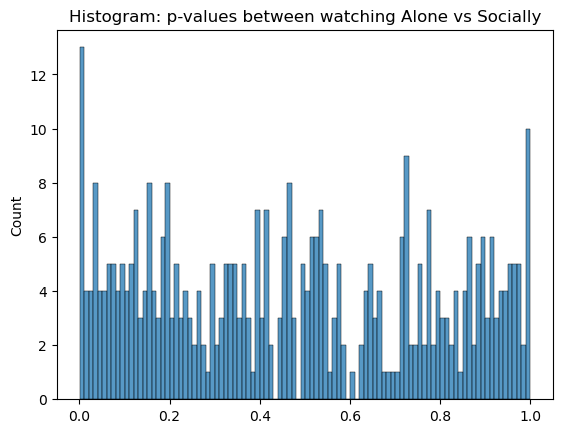

In [5]:
# now, plot the results


# sns.barplot(p_values)
bins=100
sns.histplot(p_values, bins=bins, label="Old")


plt.title('Histogram: p-values between watching Alone vs Socially')
# plt.xlabel('rating')
# plt.ylabel('count of rating')
# # plt.legend()
# # plt.ylim([0, 1])
plt.show()

In [12]:
# try to see what this data looks like in significance

alpha = 0.005

notsig = []
sig = []


for p in p_values:
    
    if p > alpha:
        notsig.append(p)
    elif p < alpha:
        sig.append(p)
    else:
        print("exact")

        
        
        
print("sizeof notsig: %s" % len(notsig))
print("sizeof sig: %s" % len(sig))

total = len(p_values)
gendered_effect = float(len(sig) / total) * 100
print("proportion of films exhibiting a social watching effect: %s" % gendered_effect)



sizeof notsig: 390
sizeof sig: 10
proportion of films exhibiting a social watching effect: 2.5


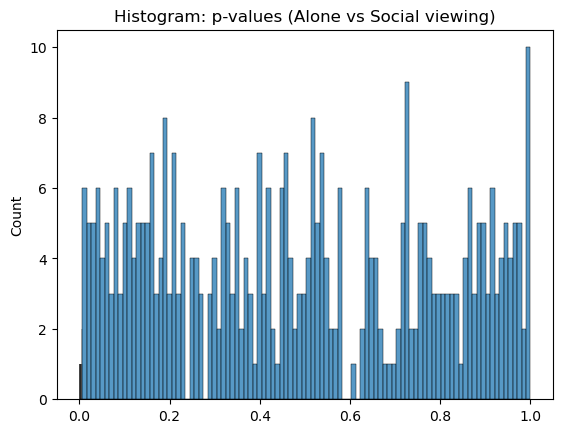

In [13]:
# now, plot the results


# sns.barplot(p_values)
bins=100
sns.histplot(sig, bins=bins, color="yellow", label="significant")
sns.histplot(notsig, bins=bins, label="not significant")

plt.title('Histogram: p-values (Alone vs Social viewing)')
# plt.xlabel('rating')
# plt.ylabel('count of rating')
# # plt.legend()
# # plt.ylim([0, 1])
plt.show()

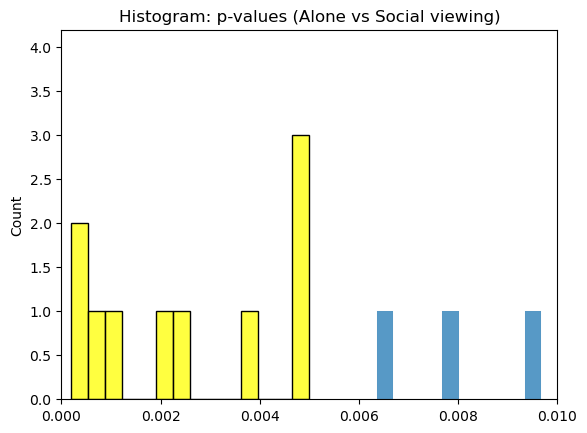

In [14]:
# now, plot the results which are significant vs insignificant


# sns.barplot(p_values)
bins=1000
sns.histplot(sig, bins=14, color="yellow", label="significant")
sns.histplot(notsig, bins=3000, label="not significant")



plt.title('Histogram: p-values (Alone vs Social viewing)')
# plt.xlabel('rating')
# plt.ylabel('count of rating')
# # plt.legend()
# # plt.ylim([0, 1])

plt.xlim([0,0.01])
plt.show()

In [10]:
# now lets compare entire distributions



# ks_pvalues



# try to see what this data looks like in significance

alpha = 0.005

ks_notsig = []
ks_sig = []


for p in ks_pvalues:
    
    if p > alpha:
       ks_notsig.append(p)
    elif p < alpha:
        ks_sig.append(p)
    else:
        print("exact")

        
        
        
print("sizeof notsig: %s" % len(ks_notsig))
print("sizeof sig: %s" % len(ks_sig))

total = len(ks_pvalues)

ks_gendered_effect = float(len(ks_sig) / total) * 100
print("proportion of films exhibiting a gendered effect: %s" % ks_gendered_effect)





sizeof notsig: 398
sizeof sig: 2
proportion of films exhibiting a gendered effect: 0.5
